In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
# Keras / Deep Learning
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras import optimizers, regularizers
from keras.optimizers import Adam
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from tensorflow.python.keras import Sequential
import matplotlib.pyplot as plt

In [9]:
data = pd.read_csv('/Users/lincong/Downloads/lstmdata.csv')

In [12]:
data = data.sort_values(by=['timestamp']).reset_index().drop('index', axis = 1)

In [33]:
final_lstm_data = data.loc[74:, ].reset_index().drop('index', axis = 1)

In [43]:
x_data = final_lstm_data.drop(['timestamp', 'Close'], axis = 1)
y_data = final_lstm_data['Close']

In [44]:
# train/test split
train_ind = int(0.8 * final_lstm_data.shape[0])
x_train = x_data[:train_ind]
x_test = x_data[train_ind:]
y_train = y_data[:train_ind]
y_test = y_data[train_ind:]

In [49]:
# standardization
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_train_sc = scaler_x.fit_transform(x_train)
x_test_sc = scaler_x.transform(x_test)

In [60]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

In [64]:
y_train_sc = scaler_y.fit_transform(y_train)
y_test_sc = scaler_y.transform(y_test)

In [66]:
def lstm_data_transform(x_data, y_data, num_steps=5):
    # Prepare the list for the transformed data
    X, y = list(), list()
    # Loop of the entire data set
    for i in range(x_data.shape[0]):
        # compute a new (sliding window) index
        end_ix = i + num_steps
        # if index is larger than the size of the dataset, we stop
        if end_ix >= x_data.shape[0]:
            break
        # Get a sequence of data for x
        seq_X = x_data[i:end_ix]
        # Get only the last element of the sequency for y
        seq_y = y_data[end_ix]
        # Append the list with sequencies
        X.append(seq_X)
        y.append(seq_y)
    # Make final arrays
    x_array = np.array(X)
    y_array = np.array(y)
    return x_array, y_array

In [132]:
num_steps = 3
# training set
(x_train_transformed, y_train_transformed) = lstm_data_transform(x_train_sc, y_train_sc, num_steps=num_steps)

# test set
(x_test_transformed, y_test_transformed) = lstm_data_transform(x_test_sc, y_test_sc, num_steps=num_steps)


In [134]:
model = Sequential()
model.add(LSTM(20, activation='tanh', input_shape=(num_steps, 6), return_sequences=False))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mse')

In [142]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 20)                2160      
_________________________________________________________________
dense_24 (Dense)             (None, 20)                420       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 21        
Total params: 2,601
Trainable params: 2,601
Non-trainable params: 0
_________________________________________________________________


In [135]:
model.fit(x_train_transformed, y_train_transformed, epochs=100)
test_predict = model.predict(x_test_transformed)

Train on 246 samples
Epoch 1/100
246/246 [==============================] - 3s 12ms/sample - loss: 0.9718
Epoch 2/100
246/246 [==============================] - 0s 234us/sample - loss: 0.7223
Epoch 3/100
246/246 [==============================] - 0s 243us/sample - loss: 0.5236
Epoch 4/100
246/246 [==============================] - 0s 230us/sample - loss: 0.3595
Epoch 5/100
246/246 [==============================] - 0s 243us/sample - loss: 0.2363
Epoch 6/100
246/246 [==============================] - 0s 236us/sample - loss: 0.1504
Epoch 7/100
246/246 [==============================] - 0s 280us/sample - loss: 0.0927
Epoch 8/100
246/246 [==============================] - 0s 239us/sample - loss: 0.0601
Epoch 9/100
246/246 [==============================] - 0s 246us/sample - loss: 0.0466
Epoch 10/100
246/246 [==============================] - 0s 252us/sample - loss: 0.0414
Epoch 11/100
246/246 [==============================] - 0s 237us/sample - loss: 0.0394
Epoch 12/100
246/246 [==========

246/246 [==============================] - 0s 311us/sample - loss: 0.0241
Epoch 96/100
246/246 [==============================] - 0s 303us/sample - loss: 0.0240
Epoch 97/100
246/246 [==============================] - 0s 345us/sample - loss: 0.0241
Epoch 98/100
246/246 [==============================] - 0s 389us/sample - loss: 0.0240
Epoch 99/100
246/246 [==============================] - 0s 387us/sample - loss: 0.0239
Epoch 100/100
246/246 [==============================] - 0s 339us/sample - loss: 0.0239


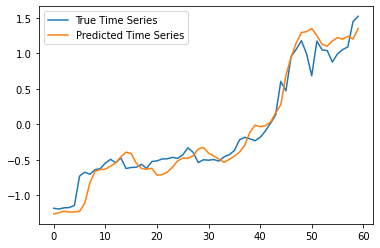

In [136]:
plt.plot(y_test_transformed, label = 'True Time Series')
plt.plot(test_predict, label = 'Predicted Time Series')
plt.legend()
plt.show()